
Importing Necessary Packages


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point
import matplotlib.pyplot as plt
import pandas as pd
import geopandas
import pyproj
file_dir = ('/Users/maddie/Projects/CPSC_597/data/')

In [2]:
taxa=pd.read_csv('/Users/maddie/Projects/CPSC_597/data/data_raw/fish_data/taxa.txt',header=None)
taxa.columns=["taxon"]
species_occ_dict={}

print(taxa)

for i in taxa['taxon']:
    taxon_data = pd.read_csv('/Users/maddie/Projects/CPSC_597/data/data_raw/fish_data/%s.csv'%i)
    species_occ_dict['%s'%i] = taxon_data



                   taxon
0       Engraulis_mordax
1      Scomber_japonicus
2        Sebastes_goodei
3  Semicossyphus_pulcher
4       Thunnus_alalunga
5        Xiphias_gladius


Text(-119.05, 32.6, 'San Diego')

Text(-120.5, 33.6, 'Los Angeles')

Text(-122, 37.65, 'San Francisco')

Text(0.5, 1.0, 'Filtered occurrences for Scomber_japonicus')

Text(-119.05, 32.6, 'San Diego')

Text(-120.5, 33.6, 'Los Angeles')

Text(-122, 37.65, 'San Francisco')

Text(0.5, 1.0, 'Filtered occurrences for Scomber_japonicus')

Text(-119.05, 32.6, 'San Diego')

Text(-120.5, 33.6, 'Los Angeles')

Text(-122, 37.65, 'San Francisco')

Text(0.5, 1.0, 'Filtered occurrences for Sebastes_goodei')

Text(-119.05, 32.6, 'San Diego')

Text(-120.5, 33.6, 'Los Angeles')

Text(-122, 37.65, 'San Francisco')

Text(0.5, 1.0, 'Filtered occurrences for Semicossyphus_pulcher')

Text(-119.05, 32.6, 'San Diego')

Text(-120.5, 33.6, 'Los Angeles')

Text(-122, 37.65, 'San Francisco')

Text(0.5, 1.0, 'Filtered occurrences for Thunnus_alalunga')

Text(-119.05, 32.6, 'San Diego')

Text(-120.5, 33.6, 'Los Angeles')

Text(-122, 37.65, 'San Francisco')

Text(0.5, 1.0, 'Filtered occurrences for Xiphias_gladius')

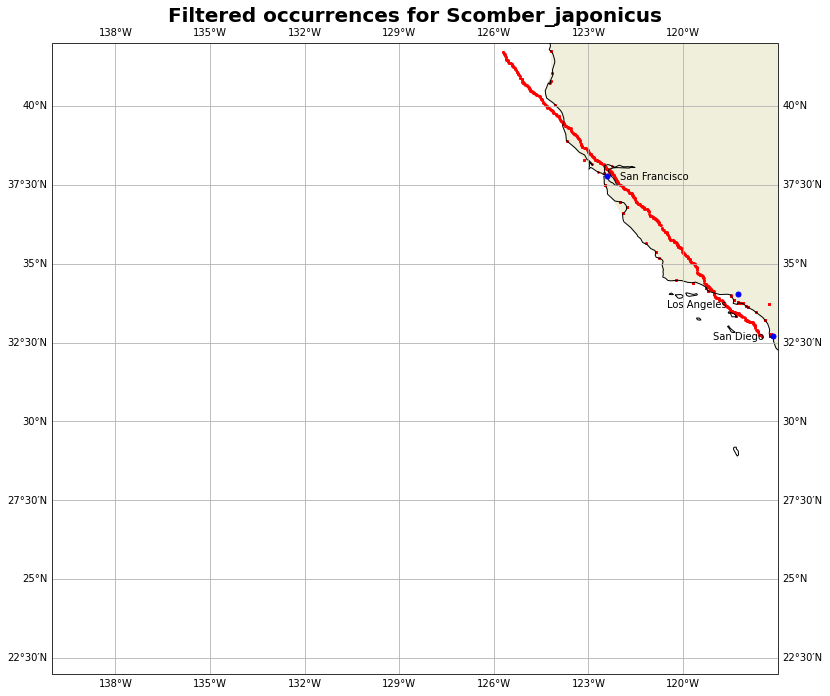

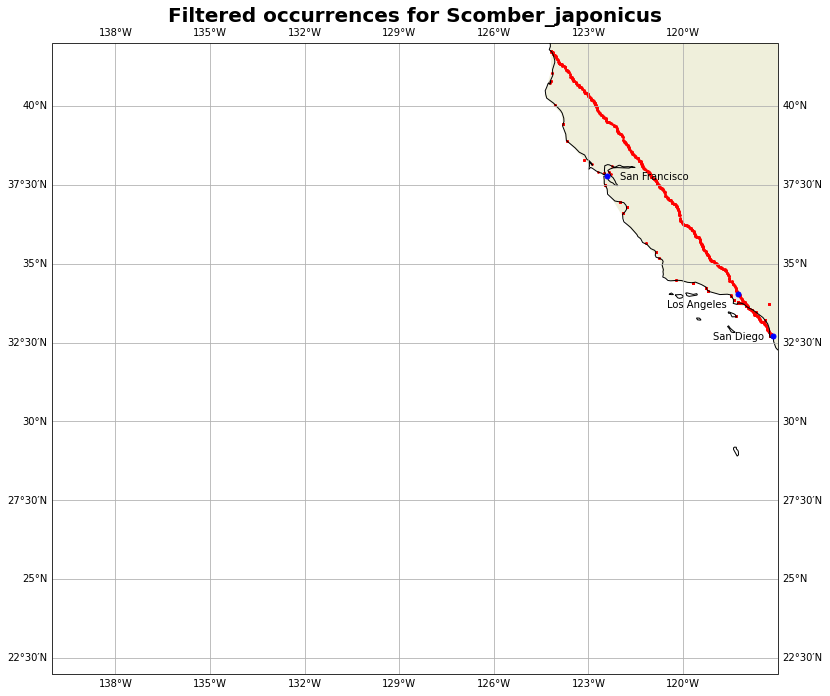

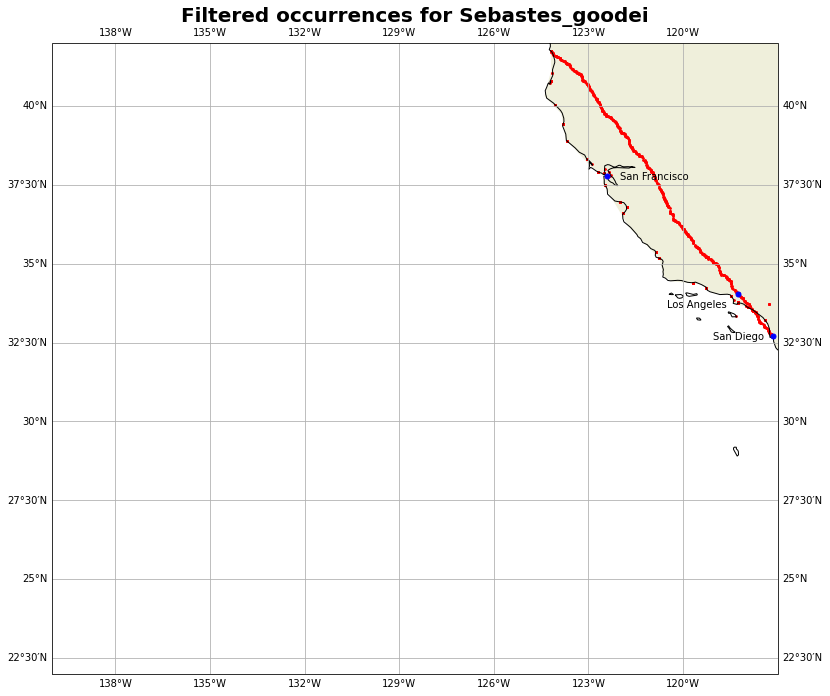

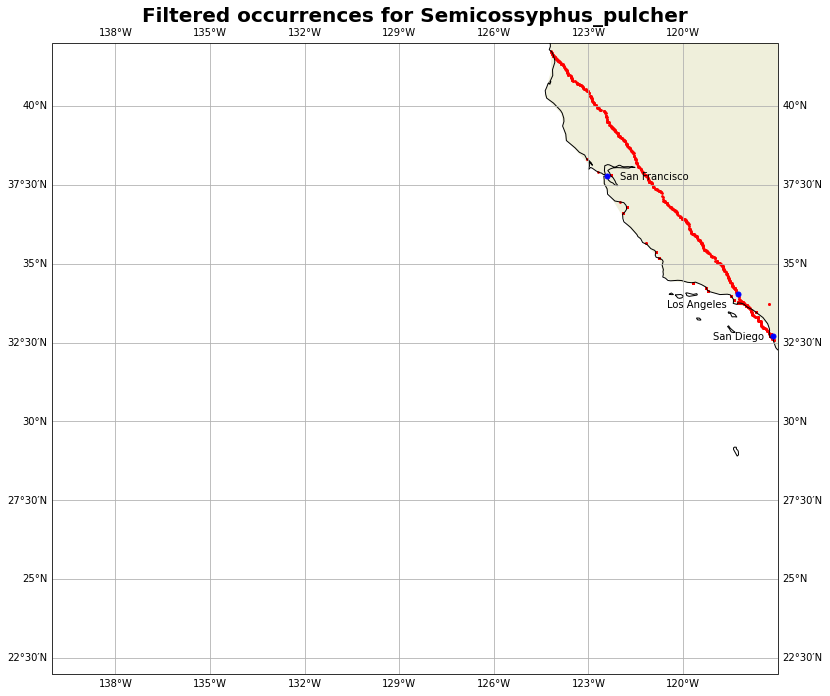

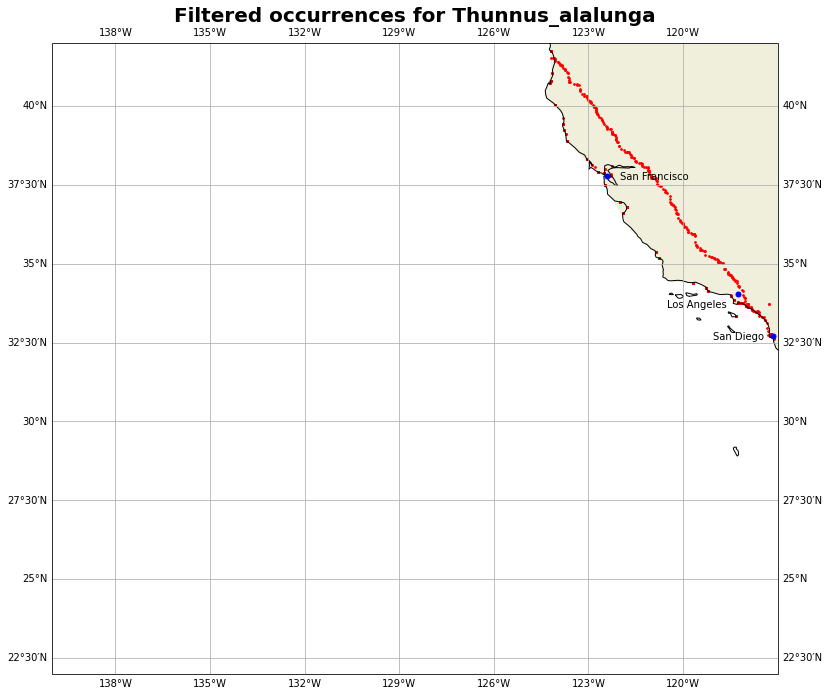

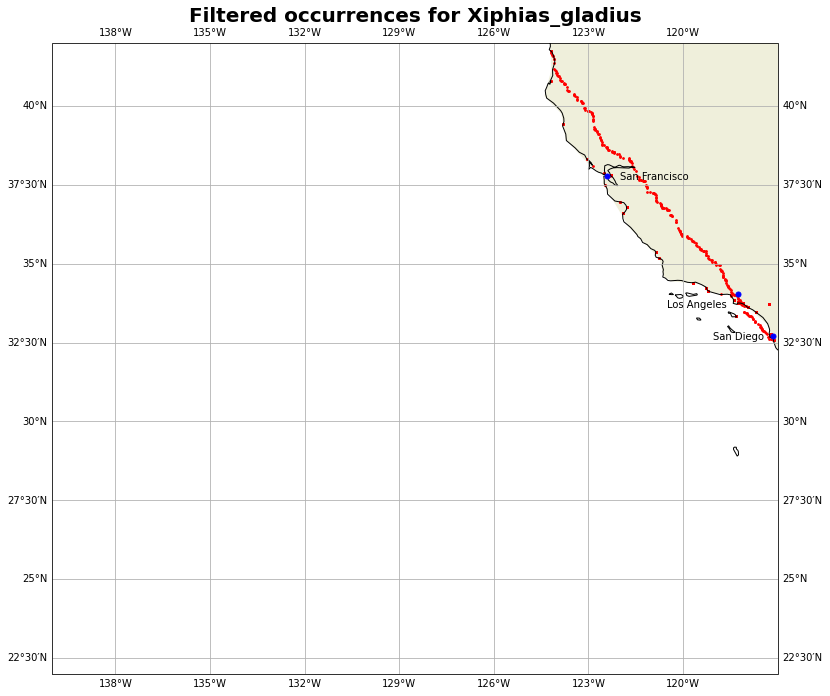

In [3]:

for key in species_occ_dict:
    
    #extract occurrence data for species
    data = species_occ_dict[key]
    spec = data["sci_name"][0]
    spec=spec.replace(" ","_")
    
    lat=data["deci_lat"]
    lon=data["deci_lon"]





    fig = plt.figure(figsize=(13,13))
    ax = fig.add_subplot(1,1,1,projection = ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.set_extent([-117, -140, 22, 42], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND.with_scale('110m'))
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    plt.scatter(x=lon,y=lat,color='red',s=3, alpha=1, transform = ccrs.PlateCarree())
    ax.plot(-117.1625, 32.715, 'bo', markersize=5, transform=ccrs.PlateCarree())
    ax.text(-119.05, 32.6, 'San Diego', transform=ccrs.PlateCarree())
    ax.plot(-118.2437, 34.0522, 'bo', markersize=5, transform=ccrs.PlateCarree())
    ax.text(-120.5, 33.6, 'Los Angeles', transform=ccrs.PlateCarree())
    ax.plot(-122.4194, 37.7749, 'bo', markersize=5, transform=ccrs.PlateCarree())
    ax.text(-122, 37.65, 'San Francisco', transform=ccrs.PlateCarree())

    spec_t=spec.replace(" ","_") 
    plt.title("Filtered occurrences for %s"%spec_t,fontsize=20,fontweight="bold")
    plt.savefig(file_dir+'/results/{}/{}_occurrence_map.jpeg'.format(spec,spec),pad_inches=0.0, bbox_inches='tight')
    plt.savefig(file_dir+'/results/{}/{}_occurrence_map.png'.format(spec,spec),pad_inches=0.0, bbox_inches='tight')


